<a href="https://colab.research.google.com/github/shorya-ag/Hangman_Game/blob/main/Hangman_game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
from PIL import Image #for opening an image
from IPython.display import display #for displaying image


Let's play Hangman!

Visual Representation



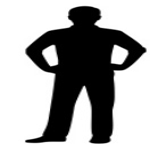


Normal Representation

-----
    |
 O  |
/|\ |
/ \ |
    |
-----


_ _ _ _ 
Tries left: 4
Guess a letter: a
Good job! 'a' is in the word.
_ a _ _
Tries left: 4
Guess a letter: z
Sorry, 'z' is not in the word. You have 3 tries left.
Visual Representation



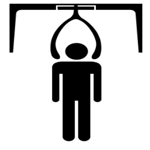


Normal Representation

-----
 |  |
 O  |
/|\ |
/ \ |
    |
-----

_ a _ _
Tries left: 3
Guess a letter: x
Sorry, 'x' is not in the word. You have 2 tries left.
Visual Representation



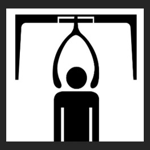


Normal Representation

-----
 |  |
 O  |
/|\ |
    |
    |
-----

_ a _ _
Tries left: 2
Guess a letter: w
Sorry, 'w' is not in the word. You have 1 tries left.
Visual Representation



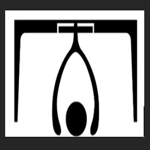


Normal Representation

-----
 |  |
 O  |
    |
    |	
    |
-----

_ a _ _
Tries left: 1
Guess a letter: v
Sorry, 'v' is not in the word. You have 0 tries left.
Visual Representation



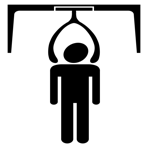


Normal Representation

-----
 |  |
 -  |
    |
    |
    |
    |
-----

_ a _ _
Game over!
The word was 'Game'.


In [4]:
def get_random_word(filename):
    with open(filename, 'r') as file:
        words = file.readlines()
    words = [word.strip() for word in words]
    if not words:
        raise ValueError("The word file is empty.")
    return random.choice(words)

def get_hangman_stages(filename):
    with open(filename, 'r') as file:
        stages = file.read().split('###')
    return stages

def display_hangman(stages, tries):
    print("Normal Representation")
    return stages[tries]

def images(tries):
  image = {
      4:Image.open("/content/relax.jpg"),
      3:Image.open("/content/hanging_start.jpg"),
      2:Image.open("/content/legs_cut.jpg"),
      1:Image.open("/content/face_left.jpg"),
      0:Image.open("/content/finished.jpg")
  }
  images = image[tries]
  display_image = images.resize((150,150))
  #images.save("/content/output.jpg")
  print("Visual Representation\n")
  display(display_image)
  print()

def play_game(words_file, stages_file):
    word = get_random_word(words_file)
    stages = get_hangman_stages(stages_file)
    word_letters = set(word)  # Letters in the word
    guessed_letters = set()  # Letters guessed by the user
    correct_letters = set()  # Correctly guessed letters
    tries = 4  # Reduced number of tries
    winning = tries+1


    print("Let's play Hangman!\n")
    images(tries)
    print(display_hangman(stages,tries+1))
    print("_ " * len(word))
    while tries > 0:
        print(f"Tries left: {tries}")
        guess = input("Guess a letter: ").lower()

        if len(guess) != 1 or not guess.isalpha():
            print("Invalid input. Please guess a single letter.")
            continue

        if guess in guessed_letters:
            print("You already guessed that letter.")
            continue

        guessed_letters.add(guess)

        if guess in word_letters:
            correct_letters.add(guess)
            print(f"Good job! '{guess}' is in the word.")
        else:
            tries -= 1
            print(f"Sorry, '{guess}' is not in the word. You have {tries} tries left.")
            images(tries)
            print(display_hangman(stages,tries+1))

        # Display the current state of the word
        current_word = [letter if letter in correct_letters else '_' for letter in word]
        print(" ".join(current_word))

        if correct_letters == word_letters:
            print(f"Congratulations! You've guessed the word '{word}' correctly.")
            image = Image.open("/content/initial_relax.jpg")
            print(display_hangman(stages,winning))
            return
    #images(tries)
    print("Game over!")
    print(f"The word was '{word}'.")

if __name__ == "__main__":
    words_file = 'words.txt'
    stages_file = 'stages.txt'
    play_game(words_file, stages_file)